In [2]:
import numpy as np
import matplotlib.pyplot as plt
import P_Cyg as pc
from glob import glob
import pandas as pd
from astropy.stats import LombScargle
from astropy.time import Time
ccd_dir = 'C:/Users/Keyan/Desktop/Science/Data/P-Cygni/Data/synthetic_filters/VBand_CCD_WithErrors.txt'
ret_dir = 'C:/Users/Keyan/Desktop/Science/Data/P-Cygni/Data/synthetic_filters/VBand_Reticon_WithErrors.txt'

In [3]:
ccd = pd.read_csv(ccd_dir,delim_whitespace=True)
ret = pd.read_csv(ret_dir,delim_whitespace=True)
table = pd.concat([ret,ccd]).reset_index().drop(columns='index')
find_detector = lambda files : [f[4:7]    for f in files]
find_date = lambda files : [f[14:18]+'-'+f[18:20]+'-'+f[20:22]    for f in files]
table["Detector"] = find_detector(table["File/Night"])
table["Date"] = find_date(table["File/Night"])
table["MJD"] = Time(list(table.Date.values),format='fits',location=(43,-89,0)).mjd
table["Error"] = np.sqrt(table.Internal_Error **2 + table.Systematic_Error **2)
table["% Polarization"],table["Position Angle"] = pc.polarization(table.q,table.u)
table["Position Angle Error"] = pc.position_angle_error(table["% Polarization"],table.Error)

In [4]:
t = pd.DataFrame({"Detector":table.Detector, "Date":table.Date, "MJD":table.MJD, "q":table.q, "u":table.u, 
                  "% Polarization": table["% Polarization"], "Error":table.Error, "Position Angle":table["Position Angle"], 
                 "Position Angle Error":table["Position Angle Error"]})

<ErrorbarContainer object of 3 artists>

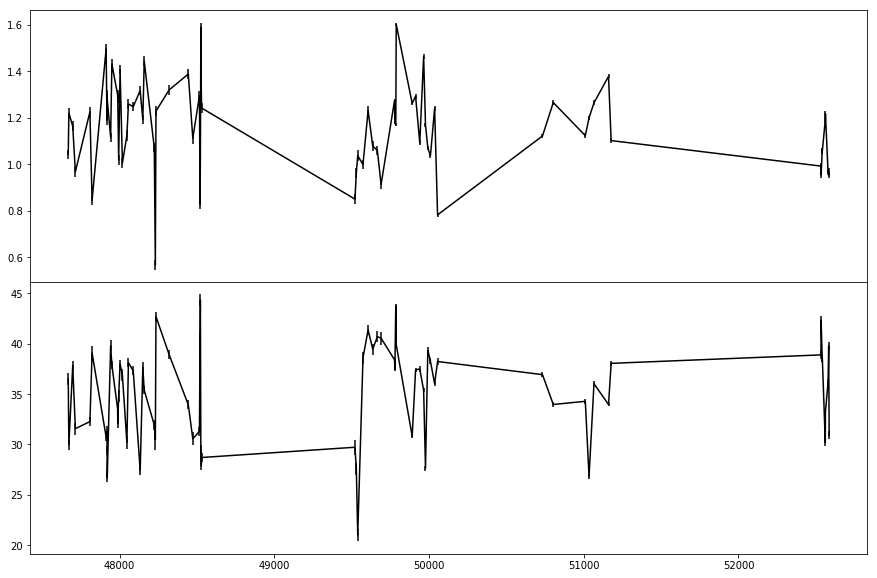

In [5]:
fig,(ax1,ax2) = plt.subplots(2,figsize=[15,10],sharex=True)
fig.subplots_adjust(wspace=0.01,hspace=0)
ax1.errorbar(t.MJD,t["% Polarization"],yerr=t.Error,color='black')
ax2.errorbar(t.MJD,t["Position Angle"],yerr=t["Position Angle Error"],color='black')

<ErrorbarContainer object of 3 artists>

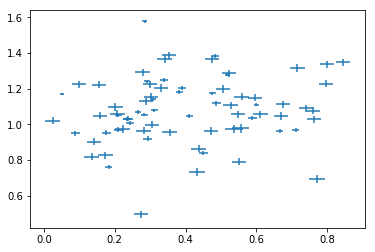

In [7]:
plt.errorbar(t.q,t.u,yerr=t.Error,xerr=t.Error,linestyle="None")